In [ ]:
from google.colab import drive # library for connecting to drive
drive.mount('/content/drive')# connect to drive

Mounted at /content/drive


In [ ]:
!pip install pydicom # install pydicom

     |████████████████████████████████| 1.9MB 5.2MB/s 


In [ ]:
from skimage.metrics import structural_similarity as ssim # ssim similarity measure function
from skimage.metrics import mean_squared_error as mse # mse function
import pydicom
import matplotlib.pyplot as plt # for plotting
import cv2 # open cv
import glob # working with folders
import os  # working with folders
import numpy as np # manipulating matrices
import progressbar

# preprocess the data

In [ ]:
!unzip /content/drive/MyDrive/brain/monthlyTumors.zip -d /content/drive/MyDrive/brain/monthlyTumors # unzip the images

In [ ]:
dirs = glob.glob('/content/drive/MyDrive/brain/monthlyTumors/CBCT*') # get the list of folders that their name start with CBCT
dirs.sort() # sort the names
num_dirs= len(dirs)
num_dirs

5

In [ ]:
dirs

['/content/drive/MyDrive/brain/monthlyTumors/CBCT giorno 1',
 '/content/drive/MyDrive/brain/monthlyTumors/CBCT giorno 2',
 '/content/drive/MyDrive/brain/monthlyTumors/CBCT giorno 3',
 '/content/drive/MyDrive/brain/monthlyTumors/CBCT giorno 4',
 '/content/drive/MyDrive/brain/monthlyTumors/CBCT giorno 5']

In [ ]:
months = []
for i in range(num_dirs):#forevery directory
  print(dirs[i])  # print the directory name
  names = glob.glob(os.path.join(dirs[i], '*.dcm')) # get the list of images in that directory
  names.sort() # sort the images name
  months.append(names) # sav ethe names to month[i]

/content/drive/MyDrive/brain/monthlyTumors/CBCT giorno 1
/content/drive/MyDrive/brain/monthlyTumors/CBCT giorno 2
/content/drive/MyDrive/brain/monthlyTumors/CBCT giorno 3
/content/drive/MyDrive/brain/monthlyTumors/CBCT giorno 4
/content/drive/MyDrive/brain/monthlyTumors/CBCT giorno 5


In [ ]:
len(months[0])

93

In [ ]:
# read a dicom image
dcm_data = pydicom.dcmread('/content/drive/MyDrive/brain/monthlyTumors/CBCT giorno 1/CT.1.2.246.352.62.1.4616356822866551718.8060131526641459849.dcm')
# get the pixel data array
image1 = dcm_data.pixel_array
# convert the image from uint16 to uint 8
image1 = np.uint8(image1/np.max(image1)*255)

dcm_data = pydicom.dcmread('/content/drive/MyDrive/brain/monthlyTumors/CBCT giorno 2/CT.1.2.246.352.62.1.4982830051596153047.15590068235322386344.dcm')
image2 = dcm_data.pixel_array
image2 = np.uint8(image2/np.max(image2)*255)

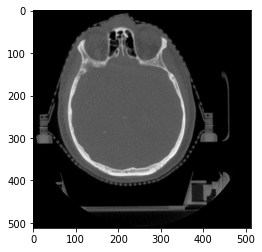

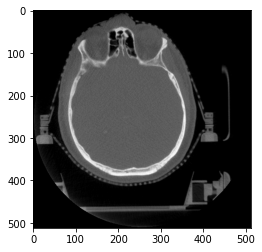

In [ ]:
plt.imshow(image1, cmap='gray')
plt.show()

plt.imshow(image2, cmap='gray')
plt.show()

In [ ]:
# just for test of ssim and mse function
m = mse(image1, image2)
s = ssim(image1, image2)

In [ ]:
m

117.84417343139648

In [ ]:
s

0.8121989023218821

In [ ]:
# remove this directory
#!rm -r /content/drive/MyDrive/brain/changeDetectionData

In [ ]:
creat this directory
!mkdir /content/drive/MyDrive/brain/changeDetectionData

In [ ]:
#just for test
a = '/content/drive/MyDrive/brain/monthlyTumors/CBCT giorno 2/CT.1.2.246.352.62.1.4615601342630832870.16875583784615511485.dcm'
a = a.split('/')[-1]
a.split('.dcm')[0]

'CT.1.2.246.352.62.1.4615601342630832870.16875583784615511485'

## group the images

**we group the images of each month together so that have a series of images**

****Saving method:****

**each picture in the first month will find its corresponding images in others months**

**each image of first month will be saved ass refrence inage and picture similar to that image will be saved in a directory of their original directory name**



In [ ]:
# the root folder to save the folders and image groups
save_dir = '/content/drive/MyDrive/brain/changeDetectionData'

for i in range(len(months[0])):# for every image in month 0 --> the first month
  dcm_data = pydicom.dcmread(months[0][i])# read the image
  ref = dcm_data.pixel_array
  #conert to unsigned integer 8 bits
  ref = np.uint8(ref/np.max(ref)*255)

  # if the directory of reference image does not exist then make one
  #see the example above for more info
  dir_name = months[0][i].split('/')[-1]
  dir_name = dir_name.split('.dcm')[0]#find the directory name
  ref_path = os.path.join(save_dir, str(i)+'_'+dir_name)# create the refrence path and folder for this image group
  if not os.path.isdir(ref_path):#if the folder does not exist
    os.mkdir(ref_path)# create it
  # save the ref
  cv2.imwrite(os.path.join(ref_path,'ref.jpg'), ref)
  #check every directory
  for j in range(1,num_dirs):
    #check every image in the directory except for the refernce image itself
    for name in months[j]: # for every image in month[j], j starts from 1
      dcm_data = pydicom.dcmread(name)# rea and convert the image to uint8
      img = dcm_data.pixel_array
      img = np.uint8(img/np.max(img)*255)
      m = mse(ref, img)#calculate mse
      s = ssim(ref, img)#calculate ssim
      if m<350 and s>0.65:# if mse<350 and ssim>0.65
        # name of the month directory
        save_to_dir = os.path.join(ref_path,name.split('/')[-2])
        image_name = name.split('/')[-1]
        image_name = image_name.split('.dcm')[0]
        if not os.path.isdir(save_to_dir):  #if the month directory doesnot exist
          os.mkdir(save_to_dir)# create one
        cv2.imwrite(os.path.join(save_to_dir,image_name+'.jpg'), img)# save the image to that month directory

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


# IR-MAD with chi-squared for Change detection

**Click on each of these links to further information**


[MAD Method Explained](https://www.programmersought.com/article/25325400440/)


[First paper Inspiration](https://ieeexplore.ieee.org/document/8364501/)

[The main Paper](http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/4695/pdf/imm4695.pdf)

In [ ]:
def covw(center_X, center_Y, w): # covariance matrix
  n = w.shape[1] # number of channels of image
  sqrt_w = np.sqrt(w)# squared root of w
  sum_w = w.sum()# sum up all the W values
  V = np.concatenate((center_X, center_Y), axis=0)# concatenate image Xand Y throug axis 0(axis 0 is downwars)
  V = sqrt_w * V
  dis = np.dot(V, V.T) / sum_w * (n / (n - 1)) # (V.V')/(sum_W*(n/(n-1)))

  return dis

In [ ]:
from numpy.linalg import inv, eig # calculating eigen values and vectors and also inverse of a matrix
from scipy.stats import chi2 # chi distance

import time
from sklearn.cluster import KMeans # K-means method

In [ ]:
def IRMAD(img_X, img_Y, max_iter=50, epsilon=1e-3):
  """
    image_X: (C, n) -> C is number of channels of image(band), n: number of pixels
    image_Y: (C, n) -> C is number of channels of image(band), n: number of pixels
    max_iter: maximum iteration
    epsilon: if eigen values < epsilon then the algorithm has converged
  """
  bands_count_X, num = img_X.shape# number of channlels, number of pixels

  weight = np.ones((1, num))  # (1, height * width)# each pixel has a wirght
  can_corr = 100 * np.ones((bands_count_X, 1))# initial eigen value

  with progressbar.ProgressBar(max_value=max_iter, redirect_stdout=True) as bar:
    for _iter in range(max_iter):# iterate max_iter times

      #calculate mean for centralization
      mean_X = np.sum(weight * img_X, axis=1, keepdims=True) / np.sum(weight)
      mean_Y = np.sum(weight * img_Y, axis=1, keepdims=True) / np.sum(weight)

      # centralization
      center_X = img_X - mean_X
      center_Y = img_Y - mean_Y

      cov_XY = covw(center_X, center_Y, weight)#calculate covariances
      size = cov_XY.shape[0]# for getting every channel covariance
      sigma_11 = cov_XY[0:bands_count_X, 0:bands_count_X]  # + 1e-4 * np.identity(3)
      sigma_22 = cov_XY[bands_count_X:size, bands_count_X:size]  # + 1e-4 * np.identity(3)
      sigma_12 = cov_XY[0:bands_count_X, bands_count_X:size]  # + 1e-4 * np.identity(3)
      sigma_21 = sigma_12.T # transpose the sigma_12

      # eigen values and vectors of this matrix are answers of a in a.T*X
      target_mat = np.dot(np.dot(np.dot(inv(sigma_11), sigma_12), inv(sigma_22)), sigma_21)
      eigenvalue, eigenvector_X = eig(target_mat)  # the eigenvalue and eigenvector of image X
      # sort eigenvector based on the size of eigenvalue
      eigenvalue = np.sqrt(eigenvalue)

      idx = eigenvalue.argsort()# get the sorted the values indices
      eigenvalue = eigenvalue[idx]# sort the values

      if (_iter + 1) == 1:
        print('Canonical correlations')
      print(eigenvalue)

      eigenvector_X = eigenvector_X[:, idx]# sort the vectors

      # eigen values and vectors of this matrix are answers of b in b.T*X
      eigenvector_Y = np.dot(np.dot(inv(sigma_22), sigma_21), eigenvector_X)  # the eigenvector of image Y

      # tune the size of X and Y, so the constraint condition can be satisfied
      norm_X = np.sqrt(1 / np.diag(np.dot(eigenvector_X.T, np.dot(sigma_11, eigenvector_X)))) # norm of constraints
      norm_Y = np.sqrt(1 / np.diag(np.dot(eigenvector_Y.T, np.dot(sigma_22, eigenvector_Y))))
      eigenvector_X = norm_X * eigenvector_X # limit the values to onstraint limits
      eigenvector_Y = norm_Y * eigenvector_Y

      mad_variates = np.dot(eigenvector_X.T, center_X) - np.dot(eigenvector_Y.T, center_Y)  # (6, width * height)

      if np.max(np.abs(can_corr - eigenvalue)) < epsilon:
        break
      can_corr = eigenvalue
      # calculate chi-square distance and probility of unchanged
      mad_var = np.reshape(2 * (1 - can_corr), (bands_count_X, 1))
      chi_square_dis = np.sum(mad_variates * mad_variates / mad_var, axis=0, keepdims=True)

      # update the weights in this iteration
      weight = 1 - chi2.cdf(chi_square_dis, bands_count_X)
      bar.update(_iter)

  if (_iter + 1) == max_iter:
    print('the canonical correlation may not be converged')
  else:
    print('the canonical correlation is converged, the iteration is %d' % (_iter + 1))

  return mad_variates, can_corr, mad_var, eigenvector_X, eigenvector_Y, sigma_11, sigma_22, sigma_12, chi_square_dis, weight


In [ ]:
def get_binary_change_map(data):
  """
  get binary change map
  :param data:
  :param method: cluster method**we couldhave used any clustering method
  :return: binary change map
  """

  # cluster the kmeans distances to two classes of changed and not changed pixels
  cluster_center = KMeans(n_clusters=2, max_iter=1500).fit(data.T).cluster_centers_.T  # shape: (1, 2)
  # cluster_center = k_means_cluster(weight, cluster_num=2)
  print('k-means cluster is done, the cluster center is ', cluster_center)
  dis_1 = np.linalg.norm(data - cluster_center[0, 0], axis=0, keepdims=True)# calculate distance of each pixel of class to cluster 0 center
  dis_2 = np.linalg.norm(data - cluster_center[0, 1], axis=0, keepdims=True)# calculate distance of each pixel of class to  cluster 0 center

  bcm = np.copy(data)  # binary change map
  if cluster_center[0, 0] > cluster_center[0, 1]:# which cluster is at the right hand side
    bcm[dis_1 > dis_2] = 0 # if the pixel is closer to class two, them it has not changed
    bcm[dis_1 <= dis_2] = 255# if the pixel is closer to class two, them it has changed
  else:
    bcm[dis_1 > dis_2] = 255 # if the pixel is closer to class two, them it has not changed
    bcm[dis_1 <= dis_2] = 0 # if the pixel is closer to class two, them it has changed

  return bcm

In [ ]:
def show_changes(image_folders):
  tic = time.time()

  i = 0
  for folder in image_folders:# ofr every folder in the refernec image folder
    images_Y = glob.glob(os.path.join(folder, '*.jpg'))# get all the images in that folder
    folder_name = folder.split('/')[-1]# get the image name
    for img_Y_name in images_Y:# for every image in that folder
      print()
      print()
      print('###########################################################')
      print('###########################################################')
      print('##############    ' + str(i)+ '    ' + folder_name + '   ##################')
      print('###########################################################')
      print('###########################################################')
      print()
      print()
      img_Y = cv2.imread(img_Y_name)# read the image
      img_Y = cv2.cvtColor(img_Y, cv2.COLOR_BGR2GRAY )#make it gray
      plt.imshow(img_Y, cmap='gray') #show the image
      plt.show()
      img_Y = img_Y.reshape(1,-1)# convert it to a vector
      img_Y.shape
      #apply mad between this image and the ref image
      #this function needs ref image to be fetched bfor calling
      mad, can_coo, mad_var, ev_1, ev_2, sigma_11, sigma_22, sigma_12, chi2_, noc_weight = IRMAD(ref, img_Y,
                                                                                                max_iter=15,
                                                                                                epsilon=1e-3)
      # chi
      sqrt_chi2 = np.sqrt(chi2_)
      # kmeans clustering to changed and unchanged
      k_means_bcm = get_binary_change_map(sqrt_chi2)
      # output to 512*512 image
      k_means_bcm = np.reshape(k_means_bcm, (img_height, img_width))
      #show the result
      plt.imshow(k_means_bcm, cmap='gray')
      plt.show()
      cv2.imwrite('brain'+str(i)+'.png', k_means_bcm)
      i = i+1
      toc = time.time()
      print(toc - tic)


## plot the changes for the first image

(1, 262144)

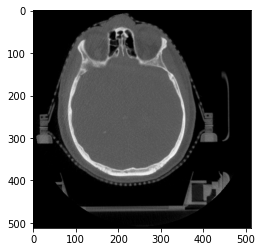

In [ ]:
ref = cv2.imread('/content/drive/MyDrive/brain/changeDetectionData/0_CT.1.2.246.352.62.1.4616356822866551718.8060131526641459849/ref.jpg')
ref = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY )
plt.imshow(ref, cmap='gray')
img_height, img_width = ref.shape
ref = ref.reshape(1,-1)
ref.shape

In [ ]:
images_Y_folders = glob.glob(os.path.join('/content/drive/MyDrive/brain/changeDetectionData/0_CT.1.2.246.352.62.1.4616356822866551718.8060131526641459849','CBCT*'))
len(images_Y_folders)

4



###########################################################
###########################################################
############    0    CBCT giorno 2   ##############
###########################################################
###########################################################




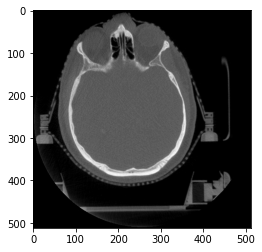

N/A% (0 of 15) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Canonical correlations
[0.94006511]


100% (15 of 15) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


[0.99485335]
[0.99907914]
[0.99982968]
the canonical correlation is converged, the iteration is 4
k-means cluster is done, the cluster center is  [[ 2.1383551  33.24155223]]


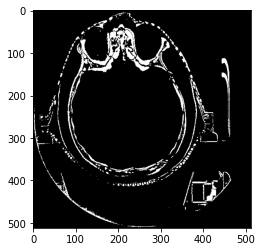

2.1595733165740967


###########################################################
###########################################################
############    1    CBCT giorno 2   ##############
###########################################################
###########################################################




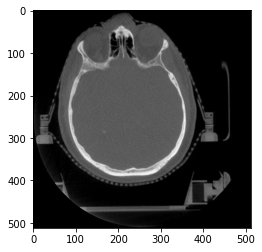

N/A% (0 of 15) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Canonical correlations
[0.96128279]


100% (15 of 15) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


[0.99621578]
[0.9992713]
[0.99986009]
the canonical correlation is converged, the iteration is 4
k-means cluster is done, the cluster center is  [[ 2.15818376 30.2755402 ]]


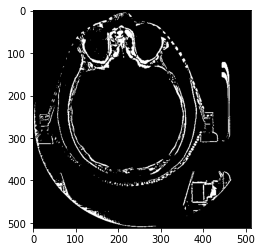

3.944319725036621


###########################################################
###########################################################
############    2    CBCT giorno 2   ##############
###########################################################
###########################################################




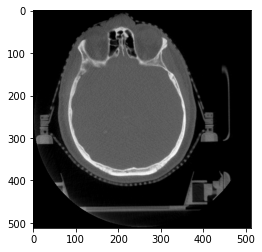

N/A% (0 of 15) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Canonical correlations
[0.97848534]


  6% (1 of 15) |#                        | Elapsed Time: 0:00:00 ETA:   0:00:03

[0.99742354]


100% (15 of 15) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


[0.99948141]
[0.99990585]
the canonical correlation is converged, the iteration is 4
k-means cluster is done, the cluster center is  [[ 2.17861573 25.54896904]]


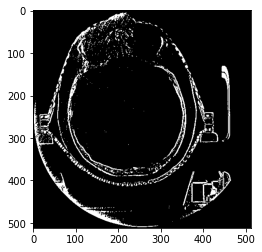

6.491143465042114


###########################################################
###########################################################
############    3    CBCT giorno 2   ##############
###########################################################
###########################################################




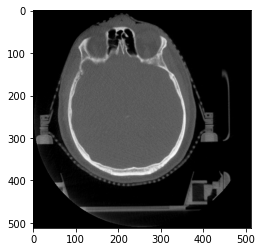

N/A% (0 of 15) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Canonical correlations
[0.96513995]


100% (15 of 15) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


[0.99648509]
[0.99932528]
[0.99987378]
the canonical correlation is converged, the iteration is 4
k-means cluster is done, the cluster center is  [[ 2.18984761 30.51696503]]


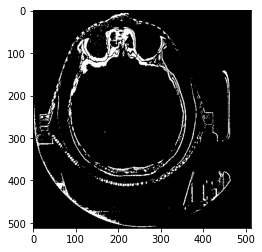

8.562611818313599


###########################################################
###########################################################
############    4    CBCT giorno 2   ##############
###########################################################
###########################################################




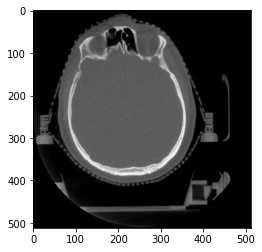

N/A% (0 of 15) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Canonical correlations
[0.94267877]


100% (15 of 15) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


[0.9952745]
[0.99915515]
[0.99984548]
the canonical correlation is converged, the iteration is 4
k-means cluster is done, the cluster center is  [[ 2.19428    36.00773857]]


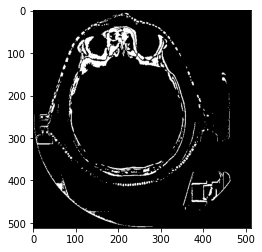

10.559325456619263


###########################################################
###########################################################
############    5    CBCT giorno 3   ##############
###########################################################
###########################################################




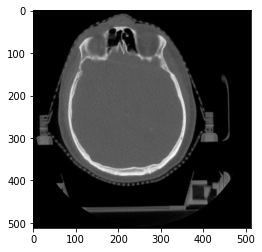

N/A% (0 of 15) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Canonical correlations
[0.95048714]


100% (15 of 15) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


[0.99659449]
[0.9994182]
[0.9998997]
the canonical correlation is converged, the iteration is 4
k-means cluster is done, the cluster center is  [[43.67226545  2.21180407]]


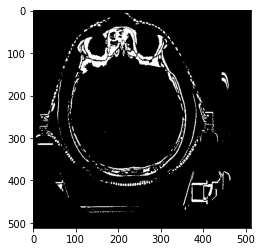

12.927546501159668


###########################################################
###########################################################
############    6    CBCT giorno 3   ##############
###########################################################
###########################################################




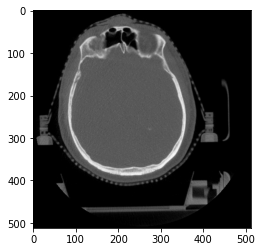

N/A% (0 of 15) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Canonical correlations
[0.93462742]


100% (15 of 15) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


[0.99572816]
[0.99930745]
[0.99988053]
the canonical correlation is converged, the iteration is 4
k-means cluster is done, the cluster center is  [[43.7551711   2.16663555]]


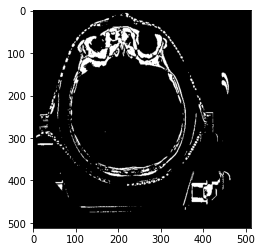

14.922521114349365


###########################################################
###########################################################
############    7    CBCT giorno 3   ##############
###########################################################
###########################################################




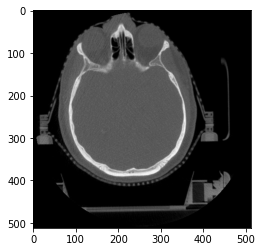

N/A% (0 of 15) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Canonical correlations
[0.94108355]


100% (15 of 15) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


[0.99612082]
[0.99934448]
[0.99988648]
the canonical correlation is converged, the iteration is 4
k-means cluster is done, the cluster center is  [[ 2.18851057 44.05959414]]


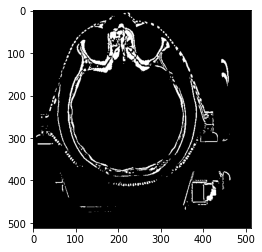

16.882410049438477


###########################################################
###########################################################
############    8    CBCT giorno 3   ##############
###########################################################
###########################################################




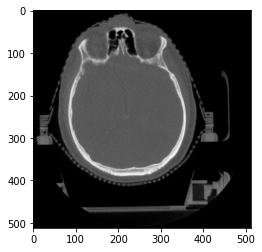

N/A% (0 of 15) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Canonical correlations
[0.97346789]


100% (15 of 15) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


[0.99770011]
[0.99957743]
[0.99992866]
the canonical correlation is converged, the iteration is 4
k-means cluster is done, the cluster center is  [[ 2.30988107 39.33050032]]


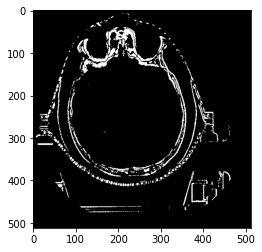

18.878265619277954


###########################################################
###########################################################
############    9    CBCT giorno 3   ##############
###########################################################
###########################################################




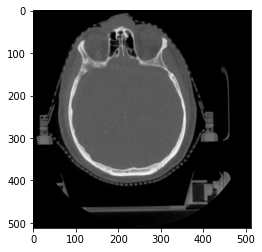

N/A% (0 of 15) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Canonical correlations
[0.98152573]


100% (15 of 15) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


[0.99818959]
[0.99965744]
[0.9999459]
the canonical correlation is converged, the iteration is 4
k-means cluster is done, the cluster center is  [[ 2.4675651 39.8316931]]


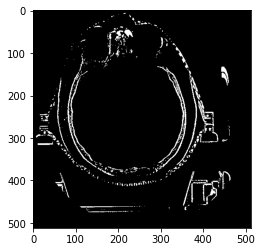

21.011786460876465


###########################################################
###########################################################
############    10    CBCT giorno 3   ##############
###########################################################
###########################################################




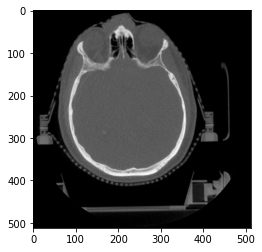

N/A% (0 of 15) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Canonical correlations
[0.95925198]


100% (15 of 15) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


[0.99705052]
[0.99947778]
[0.99991268]
the canonical correlation is converged, the iteration is 4
k-means cluster is done, the cluster center is  [[ 2.24996012 42.76368761]]


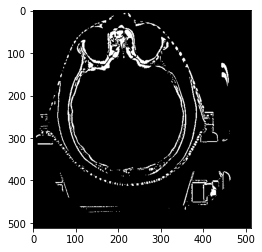

23.102949619293213


###########################################################
###########################################################
############    11    CBCT giorno 4   ##############
###########################################################
###########################################################




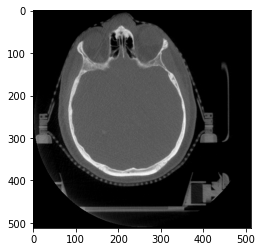

N/A% (0 of 15) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Canonical correlations
[0.95905679]


  6% (1 of 15) |#                        | Elapsed Time: 0:00:00 ETA:   0:00:02

[0.99609623]


100% (15 of 15) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


[0.99925979]
[0.99986058]
the canonical correlation is converged, the iteration is 4
k-means cluster is done, the cluster center is  [[30.22608718  2.1310765 ]]


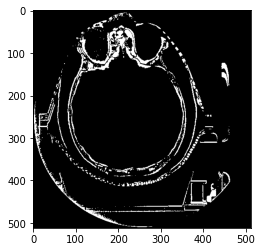

25.526997089385986


###########################################################
###########################################################
############    12    CBCT giorno 4   ##############
###########################################################
###########################################################




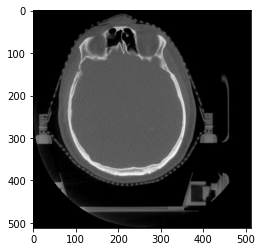

N/A% (0 of 15) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Canonical correlations
[0.94269777]


100% (15 of 15) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


[0.99524579]
[0.99915282]
[0.99983932]
the canonical correlation is converged, the iteration is 4
k-means cluster is done, the cluster center is  [[ 2.18722213 34.90254521]]


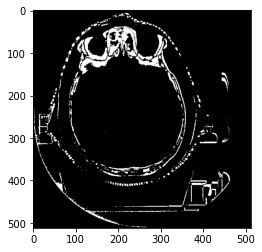

27.81200885772705


###########################################################
###########################################################
############    13    CBCT giorno 4   ##############
###########################################################
###########################################################




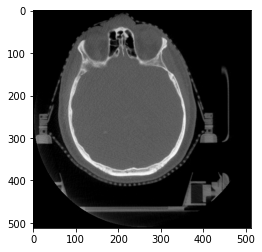

N/A% (0 of 15) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Canonical correlations
[0.9782473]


[0.99752007]
[0.99949304]


100% (15 of 15) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


[0.99990378]
the canonical correlation is converged, the iteration is 4
k-means cluster is done, the cluster center is  [[ 2.21715785 26.82397421]]


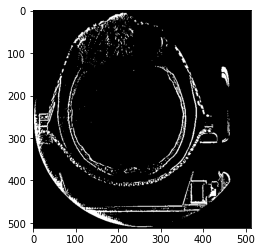

30.141518592834473


###########################################################
###########################################################
############    14    CBCT giorno 4   ##############
###########################################################
###########################################################




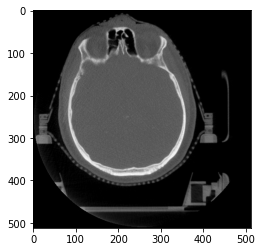

N/A% (0 of 15) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Canonical correlations
[0.96628053]


100% (15 of 15) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


[0.99658211]
[0.99934043]
[0.99987649]
the canonical correlation is converged, the iteration is 4
k-means cluster is done, the cluster center is  [[ 2.17855162 29.59386797]]


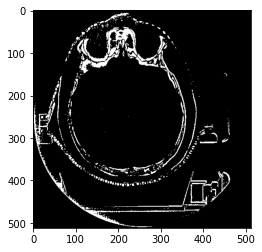

32.70678758621216


###########################################################
###########################################################
############    15    CBCT giorno 4   ##############
###########################################################
###########################################################




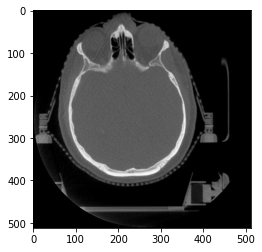

N/A% (0 of 15) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Canonical correlations
[0.9387921]


100% (15 of 15) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


[0.99481341]
[0.99907521]
[0.99982656]
the canonical correlation is converged, the iteration is 4
k-means cluster is done, the cluster center is  [[ 2.14078185 33.47612021]]


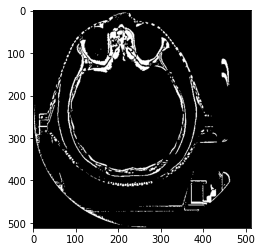

34.63826513290405


###########################################################
###########################################################
############    16    CBCT giorno 5   ##############
###########################################################
###########################################################




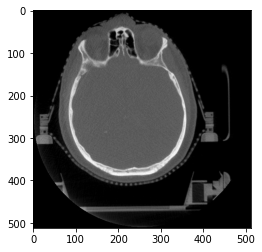

N/A% (0 of 15) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Canonical correlations
[0.96491313]


100% (15 of 15) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


[0.99644605]
[0.99931114]
[0.99987036]
the canonical correlation is converged, the iteration is 4
k-means cluster is done, the cluster center is  [[ 2.26482233 32.0769163 ]]


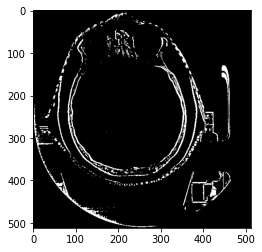

36.79240894317627


###########################################################
###########################################################
############    17    CBCT giorno 5   ##############
###########################################################
###########################################################




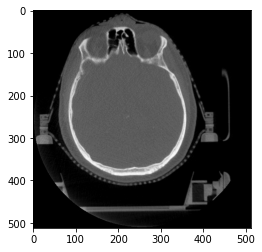

N/A% (0 of 15) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Canonical correlations
[0.95463125]


100% (15 of 15) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


[0.99568699]
[0.99920482]
[0.99984989]
the canonical correlation is converged, the iteration is 4
k-means cluster is done, the cluster center is  [[ 2.17332554 31.96389116]]


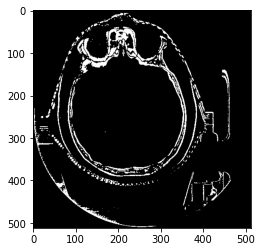

38.98763728141785


###########################################################
###########################################################
############    18    CBCT giorno 5   ##############
###########################################################
###########################################################




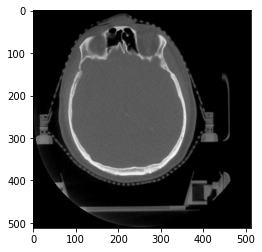

N/A% (0 of 15) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Canonical correlations
[0.93581022]


100% (15 of 15) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


[0.99470885]
[0.99907586]
[0.99983081]
the canonical correlation is converged, the iteration is 4
k-means cluster is done, the cluster center is  [[ 2.19612345 36.30874278]]


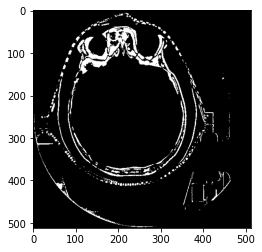

41.04546618461609


###########################################################
###########################################################
############    19    CBCT giorno 5   ##############
###########################################################
###########################################################




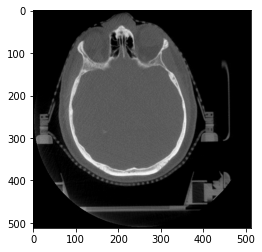

N/A% (0 of 15) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Canonical correlations
[0.94838973]


 13% (2 of 15) |###                      | Elapsed Time: 0:00:00 ETA:   0:00:02

[0.99533335]
[0.99913801]


100% (15 of 15) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


[0.99983775]
the canonical correlation is converged, the iteration is 4
k-means cluster is done, the cluster center is  [[ 2.2007926  33.64733163]]


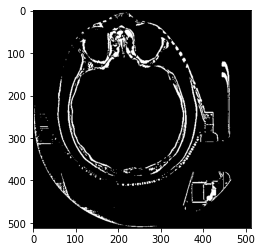

43.621758222579956


In [ ]:
show_changes(images_Y_folders)

## plot the changes for the another image

(1, 262144)


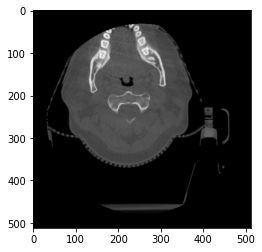

In [ ]:
ref = cv2.imread('/content/drive/MyDrive/brain/changeDetectionData/19_CT.1.2.246.352.62.1.4865947083046492762.17878788392467221399/ref.jpg')
ref = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY )
plt.imshow(ref, cmap='gray')
img_height, img_width = ref.shape
ref = ref.reshape(1,-1)
print(ref.shape)

In [ ]:
images_Y_folders = glob.glob(os.path.join('/content/drive/MyDrive/brain/changeDetectionData/19_CT.1.2.246.352.62.1.4865947083046492762.17878788392467221399','CBCT*'))
len(images_Y_folders)

4



###########################################################
###########################################################
##############    0    CBCT giorno 2   ##################
###########################################################
###########################################################




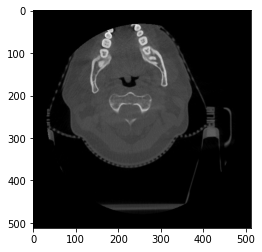

N/A% (0 of 15) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Canonical correlations
[0.93544536]


100% (15 of 15) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


[0.9956781]
[0.99937365]
[0.99992291]
the canonical correlation is converged, the iteration is 4
k-means cluster is done, the cluster center is  [[67.09607241  2.61925781]]


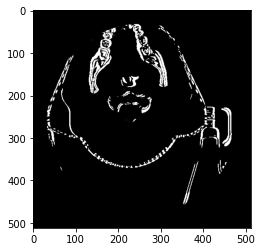

1.7270936965942383


###########################################################
###########################################################
##############    1    CBCT giorno 3   ##################
###########################################################
###########################################################




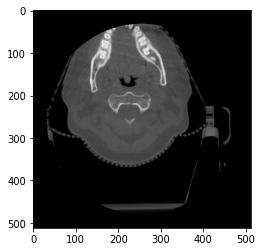

N/A% (0 of 15) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Canonical correlations
[0.96763265]


100% (15 of 15) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


[0.9979998]
[0.99973685]
[0.99997439]
the canonical correlation is converged, the iteration is 4
k-means cluster is done, the cluster center is  [[ 2.79733595 78.58892224]]


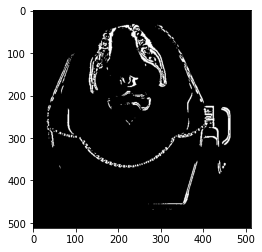

3.4868621826171875


###########################################################
###########################################################
##############    2    CBCT giorno 3   ##################
###########################################################
###########################################################




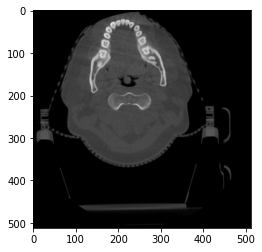

N/A% (0 of 15) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Canonical correlations
[0.90801644]


100% (15 of 15) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


[0.99524825]
[0.99936094]
[0.99991465]
the canonical correlation is converged, the iteration is 4
k-means cluster is done, the cluster center is  [[66.58374429  2.35901812]]


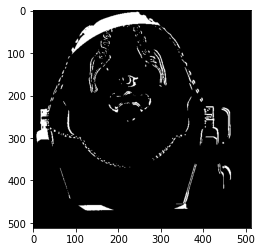

5.291200399398804


###########################################################
###########################################################
##############    3    CBCT giorno 4   ##################
###########################################################
###########################################################




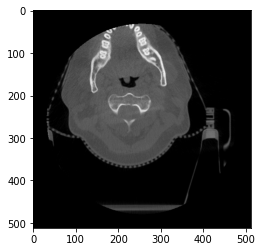

N/A% (0 of 15) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Canonical correlations
[0.960595]


100% (15 of 15) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


[0.99676696]
[0.99950495]
[0.99993661]
the canonical correlation is converged, the iteration is 4
k-means cluster is done, the cluster center is  [[ 2.64852462 57.92277296]]


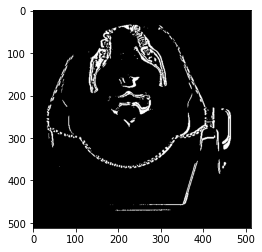

7.45742130279541


###########################################################
###########################################################
##############    4    CBCT giorno 5   ##################
###########################################################
###########################################################




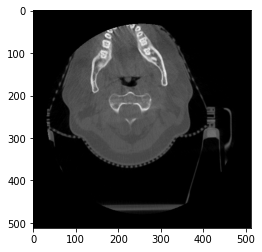

N/A% (0 of 15) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Canonical correlations
[0.93733302]


100% (15 of 15) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


[0.99557244]
[0.99935342]
[0.99991281]
the canonical correlation is converged, the iteration is 4
k-means cluster is done, the cluster center is  [[ 2.57965237 62.06364867]]


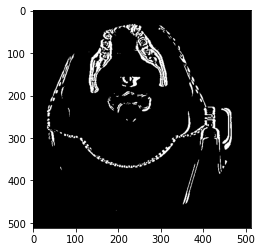

9.332893133163452


In [ ]:
show_changes(images_Y_folders)